#### Plot daily volume correlation over the last one year for a set of symbols

In [24]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, date
%matplotlib inline

In [47]:
start_date = '2020-06-20'
end_date   = '2021-06-21'

In [57]:
nifty50_30syms = "TATACONSUM.NS,KOTAKBANK.NS,SHREECEM.NS,TCS.NS,WIPRO.NS,BRITANNIA.NS,GRASIM.NS,BAJFINANCE.NS,ULTRACEMCO.NS,NESTLEIND.NS,BAJAJ-AUTO.NS,TECHM.NS,HDFCLIFE.NS,ITC.NS,ONGC.NS,HEROMOTOCO.NS,BHARTIARTL.NS,INDUSINDBK.NS,BAJAJFINSV.NS,LT.NS,TITAN.NS,COALINDIA.NS,MARUTI.NS,HINDALCO.NS,ICICIBANK.NS,TATASTEEL.NS,MM.NS,CIPLA.NS,NTPC.NS,RELIANCE.NS".split(",")
ndx_30syms    = "SCOB,TWST,NEBC,SCOA,CVCO,CVCY,SLAB,HLAH,SDH,NMRD,AGNC,OPTN,ESXB,NVCR,BBQ,CMRX,FEYE,KLXE,NVEC,NVCN,SCR,SDC,SCOR,IFRX,BBI,FNKO,NMRK,STRT,FNLC,AGLE".split(",")
nseit_syms     = ['COFORGE.NS', 'MINDTREE.NS', 'WIPRO.NS', 'MPHASIS.NS', 'TCS.NS', 'INFY.NS', 'TECHM.NS', 'HCLTECH.NS', 'LT.NS', 'NAUKRI.NS']

In [49]:
def download_data(syms, start_date, end_date): 
    data = yf.download(syms, start_date, end_date)
    
    return data

In [55]:
def plot_corr(syms, data): 
    volumes = pd.DataFrame()
    for sym in syms:
        volumes[sym] = data['Volume'][sym]
    
    volumes_t = volumes.transpose()
    volumes_t.columns = [ datetime.strftime(val, '%Y-%m-%d') for val in volumes_t.columns] 
    corr_df = pd.DataFrame(columns=['corr'])
    dates   = list(volumes_t.columns)
    for idx in range(0, len(dates)-1):
        corr_df.loc[dates[idx]] = volumes_t[dates[idx]].corr(volumes_t[dates[idx+1]])    
        
    corr_df.plot(kind='line', grid=True, title='Daily Volume Correlations', rot=30)
    plt.show()
    
    print("Mean Correlation : {}".format(round(corr_df['corr'].mean(), 4)))
    print("Std Dev. Correlation : {}".format(round(corr_df['corr'].std(), 4)))

#### Plot daily volume correlation for NSE-IT Symbols

[*********************100%***********************]  10 of 10 completed


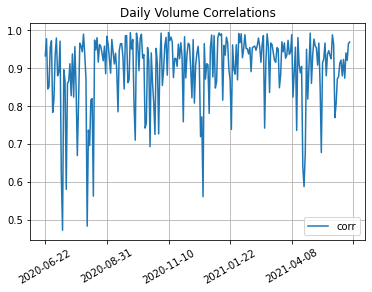

Mean Correlation : 0.8994
Std Dev. Correlation : 0.0953


In [56]:
syms = nseit_syms 
data = download_data(syms, start_date, end_date)
plot_corr(syms, data)

#### Plot daily volume correlation for 30 symbols from NIFTY 50 

[*********************100%***********************]  30 of 30 completed

1 Failed download:
- MM.NS: No data found, symbol may be delisted


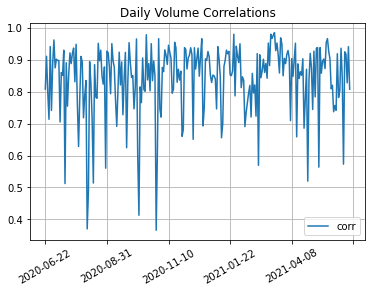

Mean Correlation : 0.8409
Std Dev. Correlation : 0.1107


In [58]:
syms = nifty50_30syms 
data = download_data(syms, start_date, end_date)
plot_corr(syms, data)

#### Plot daily volume correlation for 30 symbols from Nasdaq 100

[*********************100%***********************]  30 of 30 completed


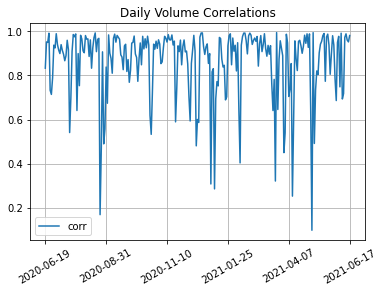

Mean Correlation : 0.8626
Std Dev. Correlation : 0.1589


In [59]:
syms = ndx_30syms 
data = download_data(syms, start_date, end_date)
plot_corr(syms, data)